<a href="https://colab.research.google.com/github/AntonioPQMartins/Finance/blob/master/Portfolio_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Description: python program for finance
#  How to compute portfolio simple returns, get daily returns and volatility

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
#Get stock symbols for portfolio (FAANG)
stockSymbols = ["FB","AMZN","AAPL","NFLX","GOOG"]

In [0]:
#Get stock starting date
stockStartDate= '2015-01-01'

In [5]:
today=datetime.today().strftime('%Y-%m-%d')

print(today)


2020-05-18


In [6]:
#Get number of assets in portfolio
numAssets=len(stockSymbols)

print('You have '+str(numAssets)+' assets in your portfolio')

You have 5 assets in your portfolio


In [0]:
#Create function to get stock prices in portfolio
def getMyPortfolio(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
  data= web.DataReader(stocks, data_source='yahoo',start=start,end=end)[col]
  return data

In [8]:
#Get the stock portfolio Adj. 
my_stocks=getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,78.449997,308.519989,99.945885,49.848572,523.373108
2015-01-05,77.190002,302.190002,97.130241,47.311428,512.463013
2015-01-06,76.150002,295.290009,97.139420,46.501427,500.585632
2015-01-07,76.150002,298.420013,98.501518,46.742859,499.727997
2015-01-08,78.180000,300.459991,102.286186,47.779999,501.303680
...,...,...,...,...,...
2020-05-12,210.100006,2356.949951,311.410004,431.820007,1375.739990
2020-05-13,205.100006,2367.919922,307.649994,438.269989,1349.329956
2020-05-14,206.809998,2388.850098,309.540009,441.950012,1356.130005


In [0]:
#Function to visualize the portfolio
def showGraph(stocks = stockSymbols, start= stockStartDate,end=today, col='Adj Close'):
  title='Portfolio' + col+'  Price History'

  my_stocks= getMyPortfolio(stocks=stocks, start=start,end=end,col=col)

  plt.figure(figsize=(12.5, 4.5))

  #Loop through each stock and plot price

  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

    plt.title(title)
    plt.xlabel('Date', fontsize = 18)
    plt.ylabel(col+' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

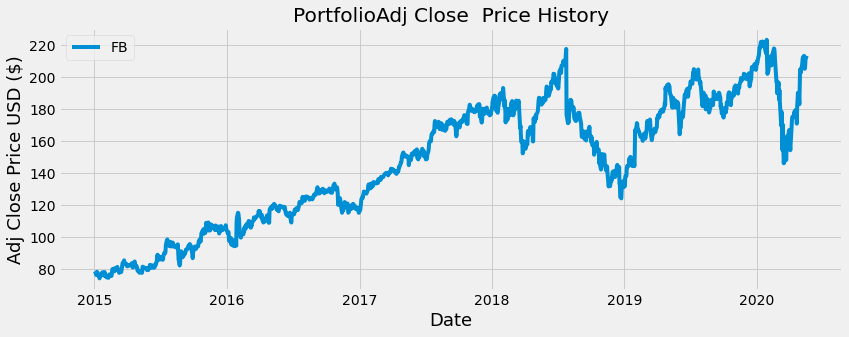

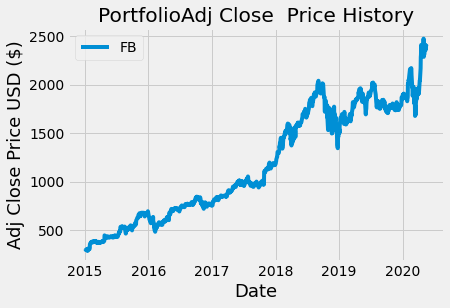

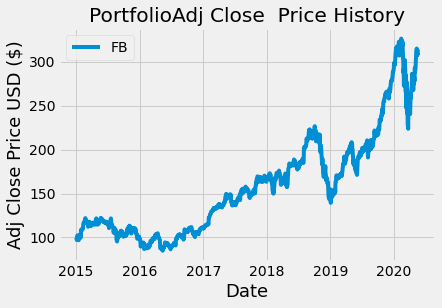

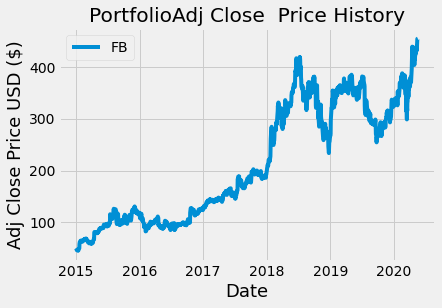

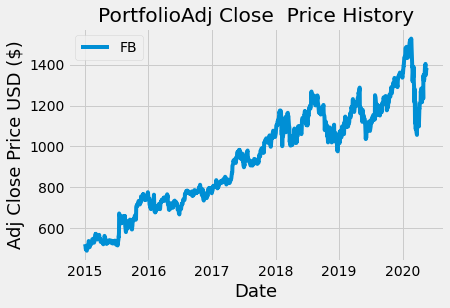

In [10]:
#Show adj close price
showGraph(stockSymbols)

In [11]:
#Calculate the simple returns
daily_simple_returns = my_stocks.pct_change(1) 

daily_simple_returns


Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.016061,-0.020517,-0.028172,-0.050897,-0.020846
2015-01-06,-0.013473,-0.022833,0.000094,-0.017121,-0.023177
2015-01-07,0.000000,0.010600,0.014022,0.005192,-0.001713
2015-01-08,0.026658,0.006836,0.038422,0.022188,0.003153
...,...,...,...,...,...
2020-05-12,-0.014448,-0.021606,-0.011428,-0.019749,-0.019611
2020-05-13,-0.023798,0.004654,-0.012074,0.014937,-0.019197
2020-05-14,0.008337,0.008839,0.006143,0.008397,0.005040


In [12]:
#Show stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.585475,0.562194,0.433029,0.670304
AMZN,0.585475,1.000000,0.529571,0.514607,0.651819
AAPL,0.562194,0.529571,1.000000,0.406133,0.623368
NFLX,0.433029,0.514607,0.406133,1.000000,0.487797
GOOG,0.670304,0.651819,0.623368,0.487797,1.000000


In [13]:
#Show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000379,0.000219,0.000197,0.000226,0.000220
AMZN,0.000219,0.000370,0.000183,0.000265,0.000212
AAPL,0.000197,0.000183,0.000323,0.000195,0.000189
NFLX,0.000226,0.000265,0.000195,0.000717,0.000221
GOOG,0.000220,0.000212,0.000189,0.000221,0.000285


In [14]:
#variance
daily_simple_returns.var()

Symbols
FB      0.000379
AMZN    0.000370
AAPL    0.000323
NFLX    0.000717
GOOG    0.000285
dtype: float64

In [15]:
#stock volatility
print("The Stock Volatility:")
daily_simple_returns.std()


The Stock Volatility:


Symbols
FB      0.019463
AMZN    0.019235
AAPL    0.017968
NFLX    0.026776
GOOG    0.016887
dtype: float64

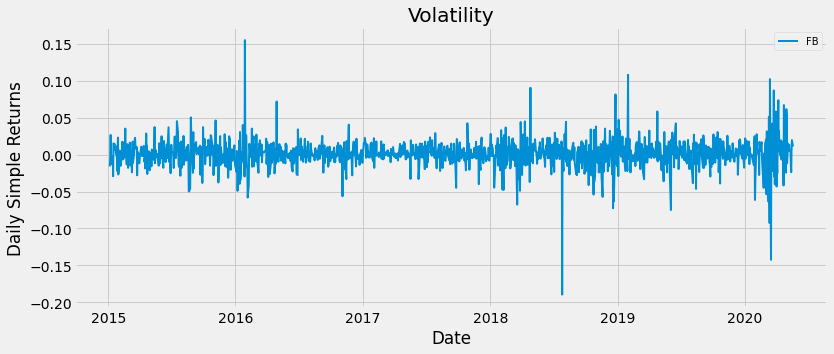

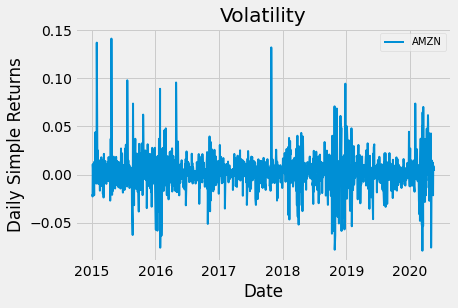

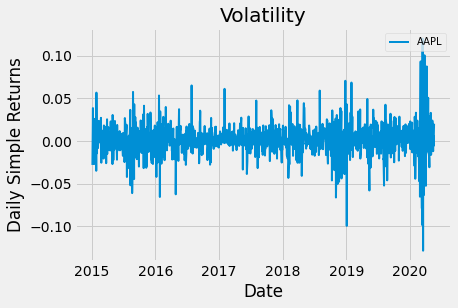

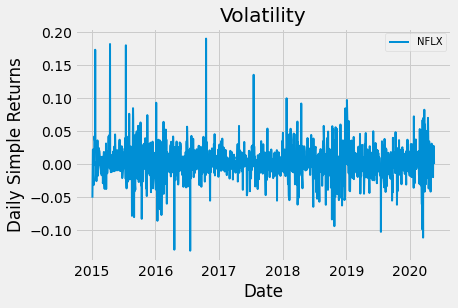

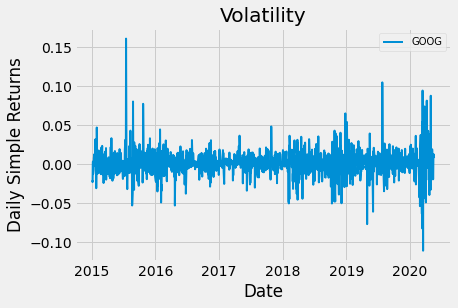

In [16]:
#Visualize volatility
plt.figure(figsize=(12,4.8))

#plot simple returns
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index,daily_simple_returns[c], lw=2, label=c)

  plt.legend(loc='upper right', fontsize= 10)
  plt.title('Volatility')
  plt.ylabel('Daily Simple Returns')
  plt.xlabel('Date')
  plt.show()

In [17]:
#Mean of daily simple return
dailyMeanSimpleReturns=daily_simple_returns.mean()

print("The daily mean simple return:")
print(dailyMeanSimpleReturns)

The daily mean simple return:
Symbols
FB      0.000931
AMZN    0.001707
AAPL    0.001008
NFLX    0.001990
GOOG    0.000861
dtype: float64


In [18]:
#Calculate expected portfolio daily return
randomWeights = np.array([0.4,0.1,0.3,0.1,0.1])

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

print("The daily expected portfolio return: " + str(portfolioSimpleReturn))

The daily expected portfolio return: 0.0011306357104214795


In [19]:
#Get the yearly simple return
print("Expected annualised portfolio simple return" + str(portfolioSimpleReturn * 253))

Expected annualised portfolio simple return0.28605083473663434


In [21]:
#Calculate the growth of the investment
dailyCumulSimpReturn=(daily_simple_returns+1).cumprod()

dailyCumulSimpReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.983939,0.979483,0.971828,0.949103,0.979154
2015-01-06,0.970682,0.957118,0.971920,0.932854,0.956460
2015-01-07,0.970682,0.967263,0.985549,0.937697,0.954822
2015-01-08,0.996558,0.973875,1.023416,0.958503,0.957832
...,...,...,...,...,...
2020-05-12,2.678139,7.639537,3.115786,8.662635,2.628603
2020-05-13,2.614404,7.675094,3.078166,8.792027,2.578142
2020-05-14,2.636201,7.742935,3.097076,8.865851,2.591134


In [24]:
#(period_1 + 1)*(period_2+1)* ..* (period_n+1)
(daily_simple_returns["GOOG"][1]+1) * (daily_simple_returns["GOOG"][2]+1)


0.9564603621364335

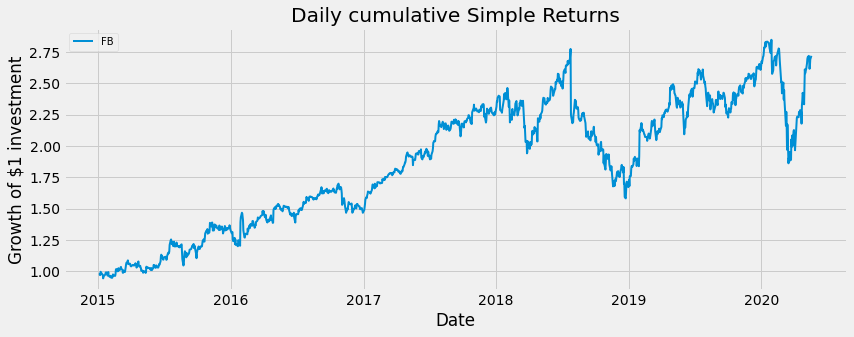

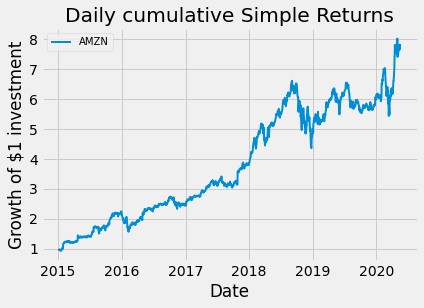

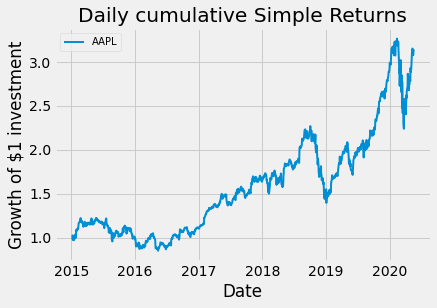

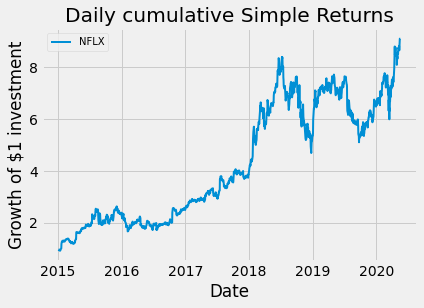

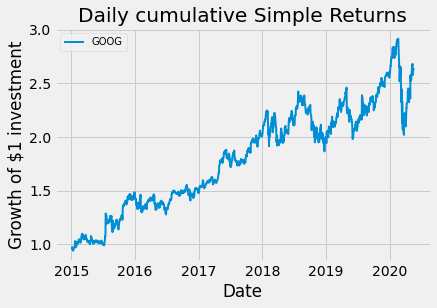

In [25]:
#Visualize daily cumulative simple returns

plt.figure(figsize=(12.5,4.5))
for c in dailyCumulSimpReturn.columns.values:
  plt.plot(dailyCumulSimpReturn.index, dailyCumulSimpReturn[c], lw=2,label=c)

  plt.legend(loc='upper left', fontsize=10)
  plt.xlabel('Date')
  plt.ylabel('Growth of $1 investment')
  plt.title('Daily cumulative Simple Returns')
  plt.show()